In [1]:
import pandas as pd
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sklearn_v_rapids = pd.read_csv('AWS Results/sklearn_v_rapids_results.csv',
                              index_col=0, 
                               header=[0, 1], skipinitialspace=True)

In [3]:
results_df_sklearn = sklearn_v_rapids['Scikit-Learn']
results_df_rapids = sklearn_v_rapids['Rapids']

In [5]:
results_df_rapids[results_df_rapids['Test'] == 'Linear Regression']

,Test,Total,Average
0,Linear Regression,0.184587,0.061529
2,Linear Regression,0.076174,0.025391
4,Linear Regression,0.075373,0.025124
6,Linear Regression,0.059574,0.019858
8,Linear Regression,0.070149,0.023383
10,Linear Regression,0.083193,0.027731
12,Linear Regression,0.151090,0.050363
14,Linear Regression,0.256414,0.085471
16,Linear Regression,0.527735,0.175912
18,Linear Regression,1.085618,0.361873


In [15]:
NUM_DSIZE_DOUBLINGS = 10

In [13]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Scikit-Learn')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')

    axs.set_ylabel('Average Time (s)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=12)
    axs.legend(loc='upper right')
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    return axs

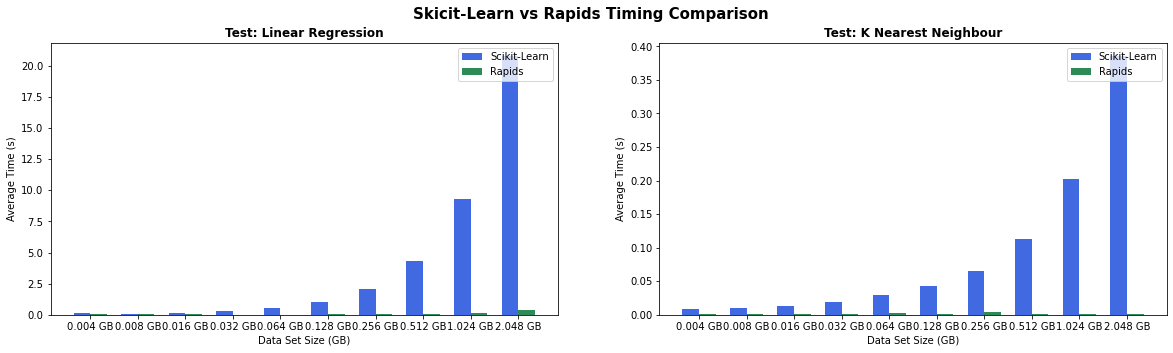

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20, 5)

fig.suptitle('Skicit-Learn vs Rapids Timing Comparison', fontsize=15, fontweight="bold")

# Setting the number of bars
ind = np.arange(NUM_DSIZE_DOUBLINGS)

# Defining the width between the bars
width = 0.35

# Defining the bar labels
bar_labels = np.round(results_df_sklearn['Test Size'].drop_duplicates(), 3).astype(str) + " GB"

plot(ax1, 
     results_df_sklearn[results_df_sklearn['Test'] == 'Linear Regression']['Average'],
     results_df_rapids[results_df_rapids['Test'] == 'Linear Regression']['Average'],
     'Linear Regression')

plot(ax2, 
     results_df_sklearn[results_df_sklearn['Test'] == 'K Nearest Neighbour']['Average'],
     results_df_rapids[results_df_rapids['Test'] == 'K Nearest Neighbour']['Average'],
     'K Nearest Neighbour')
plt.savefig('scikit-learn_v_rapids.png')
plt.show()